In [ ]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/cadence 1a/data"

import os
print(os.listdir(data_path))



['data job posts.csv', 'Resume.csv', 'Resume.gsheet', 'data job posts.gsheet']


In [ ]:
resume_df = pd.read_csv(f"{data_path}/Resume.csv")
resume_df.shape
resume_df.head()
# resume_df.isnull().sum()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
job_posts_df = pd.read_csv(f"{data_path}/data job posts.csv")
job_posts_df.shape
job_posts_df.head()
# job_posts_df.isnull().sum()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [ ]:
#Columns with missing values, turning them into a list
condition = job_posts_df.isnull().sum() != 0
job_posts_df.isnull().sum()[condition].index
columnlist = list(job_posts_df.isnull().sum()[condition].index)
columnlist

['Title',
 'Company',
 'AnnouncementCode',
 'Term',
 'Eligibility',
 'Audience',
 'StartDate',
 'Duration',
 'Location',
 'JobDescription',
 'JobRequirment',
 'RequiredQual',
 'Salary',
 'ApplicationP',
 'OpeningDate',
 'Deadline',
 'Notes',
 'AboutC',
 'Attach']

In [ ]:
job_posts_df[columnlist].dtypes
#Everything is object so meaning there's no numerical value

,0
Title,object
Company,object
AnnouncementCode,object
Term,object
Eligibility,object
Audience,object
StartDate,object
Duration,object
Location,object
JobDescription,object


In [ ]:
#for column in columnlist:
    #print(job_posts_df[column].unique())



In [ ]:
#outliers

## Addressing Null values in job_posts_df
Since there are many columns in job_posts_df with null values, we can use reasoning to drop some of the rows or columns. Some columns can be cut if they have too many null values or if they are not really relevant to the problem.  For example, the column "AnnouncementCode" has 17793 null values and the unique non-null values are a random string of letters. It was most likely used to identify the job posting on its original website. As well, "Opening Date" and "Deadline" may not have many null values, but these values might not be very useful to determine whether or not a candidate would be a good fit for a job.

In [ ]:
columns_to_drop = ['AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'StartDate', 'Duration', 'OpeningDate', 'Deadline', 'Notes', 'Attach']
job_posts_df = job_posts_df.drop(columns=columns_to_drop)
job_posts_df.isnull().sum()

,0
jobpost,0
date,0
Title,28
Company,7
Location,32
JobDescription,3892
JobRequirment,2522
RequiredQual,484
Salary,9379
ApplicationP,60


There are still null values, but the columns are too contextually important to the ML problem. We can drop the examples that have null values in these columns since they most likely do not have the information we need to train the model accurately. After we drop these rows, our job_posts_df dataset no longer has any null values.

In [ ]:
columns_to_check = ['Title', 'JobDescription', 'JobRequirment', 'Company', 'Location', 'RequiredQual', 'Salary', 'AboutC']

job_posts_df = job_posts_df.dropna(subset=columns_to_check)

job_posts_df.shape

(5459, 14)

In [ ]:
job_posts_df.isnull().sum()

,0
jobpost,0
date,0
Title,0
Company,0
Location,0
JobDescription,0
JobRequirment,0
RequiredQual,0
Salary,0
ApplicationP,0


In [ ]:
#Removing duplicates
job_posts_df = job_posts_df.drop_duplicates()
print(job_posts_df.duplicated().sum())
resume_df = resume_df.drop_duplicates()
print(resume_df.duplicated().sum())

0
0


In [ ]:
#Check which column has HTML tags
import re
def has_html(text):
    if isinstance(text, str):
        return bool(re.search(r'<.*?>', text))
    return False

In [ ]:
columns_with_html = [col for col in job_posts_df.columns if job_posts_df[col].apply(has_html).any()]
print(columns_with_html)

columns_with_html = [col for col in resume_df.columns if resume_df[col].apply(has_html).any()]
print(columns_with_html)
#So no column in job_post has any HTML tags we need to remove. Only resume :/

[]
['Resume_str', 'Resume_html']


In [ ]:
import re
def clean_html(text):
  return re.sub('<[^<]+?>', '', text)

resume_df['Resume_html'] = resume_df['Resume_str'].apply(clean_html)

In [ ]:
resume_df[['Resume_html', 'Resume_str']].head()
#They're the same thing so i'm dropping the HTML column :D
resume_df.drop(columns=['Resume_html'], inplace= True)

# Checkpoint #2 - Text Normalization
Apply tokenization, lowercasing, stopword removal, and lemmatization.

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# #Define the vectorizer
# vectorizer = TfidfVectorizer(
#     lowercase=True,
#     stop_words='english',
#     strip_accents='unicode'
# )
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Make sure NLTK resources are available
nltk.download("punkt_tab")

nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def lemmatize_and_tokenize(text):
    tokens = word_tokenize(str(text).lower())   # lowercase + tokenize
    tokens = [lemmatizer.lemmatize(t) for t in tokens
              if t.isalpha() and t not in stop_words]  # keep only words, no stopwords
    return tokens

# ✅ Define vectorizer with custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=lemmatize_and_tokenize)

# Important: pass only the resume text column
tfidf_matrix_resumes = vectorizer.fit_transform(resume_df["Resume_str"])

print("Shape of tfidf_matrix_resumes:", tfidf_matrix_resumes.shape)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of tfidf_matrix_resumes: (2484, 32389)


In [ ]:
#Fit/transform our the resumes

# This does everything in one call:
# 1. Normalizes (lowercase, stopwords, lemmatization)
# 2. Creates the vocabulary
# 3. Calculates TF-IDF vectors
tfidf_matrix_resumes = vectorizer.fit_transform(resume_df)

print("Shape of tfidf_matrix_resumes:", tfidf_matrix_resumes.shape)

Shape of tfidf_matrix_resumes: (3, 2)


In [ ]:


# Pick a few resumes to inspect
sample_indices = [0, 1, 2]  # change these to any resume indices you want
pd.set_option("display.max_colwidth", None)
for idx in sample_indices:
    original = resume_df["Resume_str"].iloc[idx][:500]  # first 500 chars only for readability
    normalized = lemmatize_and_tokenize(resume_df["Resume_str"].iloc[idx])

    print(f"=== Resume {idx} ===")
    print("Original snippet:")
    print(original, "\n")
    print("Normalized tokens:")
    print(normalized[:30], "...")  # show first 30 tokens
    print("\n" + "="*60 + "\n")


=== Resume 0 ===
Original snippet:
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-task 

Normalized tokens:
['hr', 'associate', 'hr', 'administrator', 'summary', 'dedicated', 'customer', 'service', 'manager', 'year', 'experience', 'hospitality', 'customer', 'service', 'management', 'respected', 'builder', 'leader', 'team', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', 'highlight', 'focused', 'customer', 'satisfaction'] ...


=== Resume 1 ===
Original snippet:
         HR SPECIALIST, US HR OPERATIONS       S

In [ ]:
# # Show the full text in each cell
# pd.set_option("display.max_colwidth", None)

# # Now when you print, you’ll see everything
# resume_df["Resume_str"].head()



In [ ]:
#next step is to build the model ?



In [ ]:
# See the structure
print(job_posts_df.info())

# See a few sample job posts



<class 'pandas.core.frame.DataFrame'>
Index: 5448 entries, 185 to 18999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         5448 non-null   object
 1   date            5448 non-null   object
 2   Title           5448 non-null   object
 3   Company         5448 non-null   object
 4   Location        5448 non-null   object
 5   JobDescription  5448 non-null   object
 6   JobRequirment   5448 non-null   object
 7   RequiredQual    5448 non-null   object
 8   Salary          5448 non-null   object
 9   ApplicationP    5448 non-null   object
 10  AboutC          5448 non-null   object
 11  Year            5448 non-null   int64 
 12  Month           5448 non-null   int64 
 13  IT              5448 non-null   bool  
dtypes: bool(1), int64(2), object(11)
memory usage: 601.2+ KB
None


In [ ]:
pd.set_option("display.max_colwidth", None)
job_posts_df.head(5)

jobpost  \
185                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           LadyDalieda\r\nTITLE:  Secretary / office helper\r\nOPEN TO/ ELIGIBILITY CRITERIA:  All capable people\r\nSTART DATE/ TIME:  Immediately\r\nDURATION:  Permanent\r\nLOCATION:  Yerevan, Armenia\r\nJOB DESCRIPTION:  Secretary office helper, Typing transitions from\r\nEnglish to Armenian, able to speck and understand English, Armenian and\r\nRus

# Exploratory Data Analysis

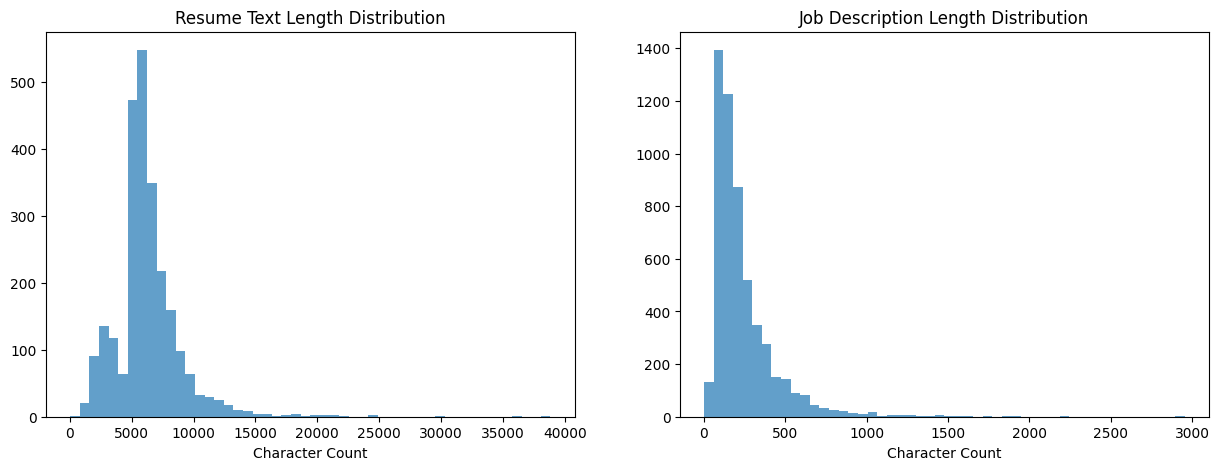

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

resume_lengths = resume_df['Resume_str'].str.len()
job_lengths = job_posts_df['JobDescription'].str.len()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(resume_lengths, bins=50, alpha=0.7)
ax1.set_title('Resume Text Length Distribution')
ax1.set_xlabel('Character Count')

ax2.hist(job_lengths, bins=50, alpha=0.7)
ax2.set_title('Job Description Length Distribution')
ax2.set_xlabel('Character Count')
plt.show()

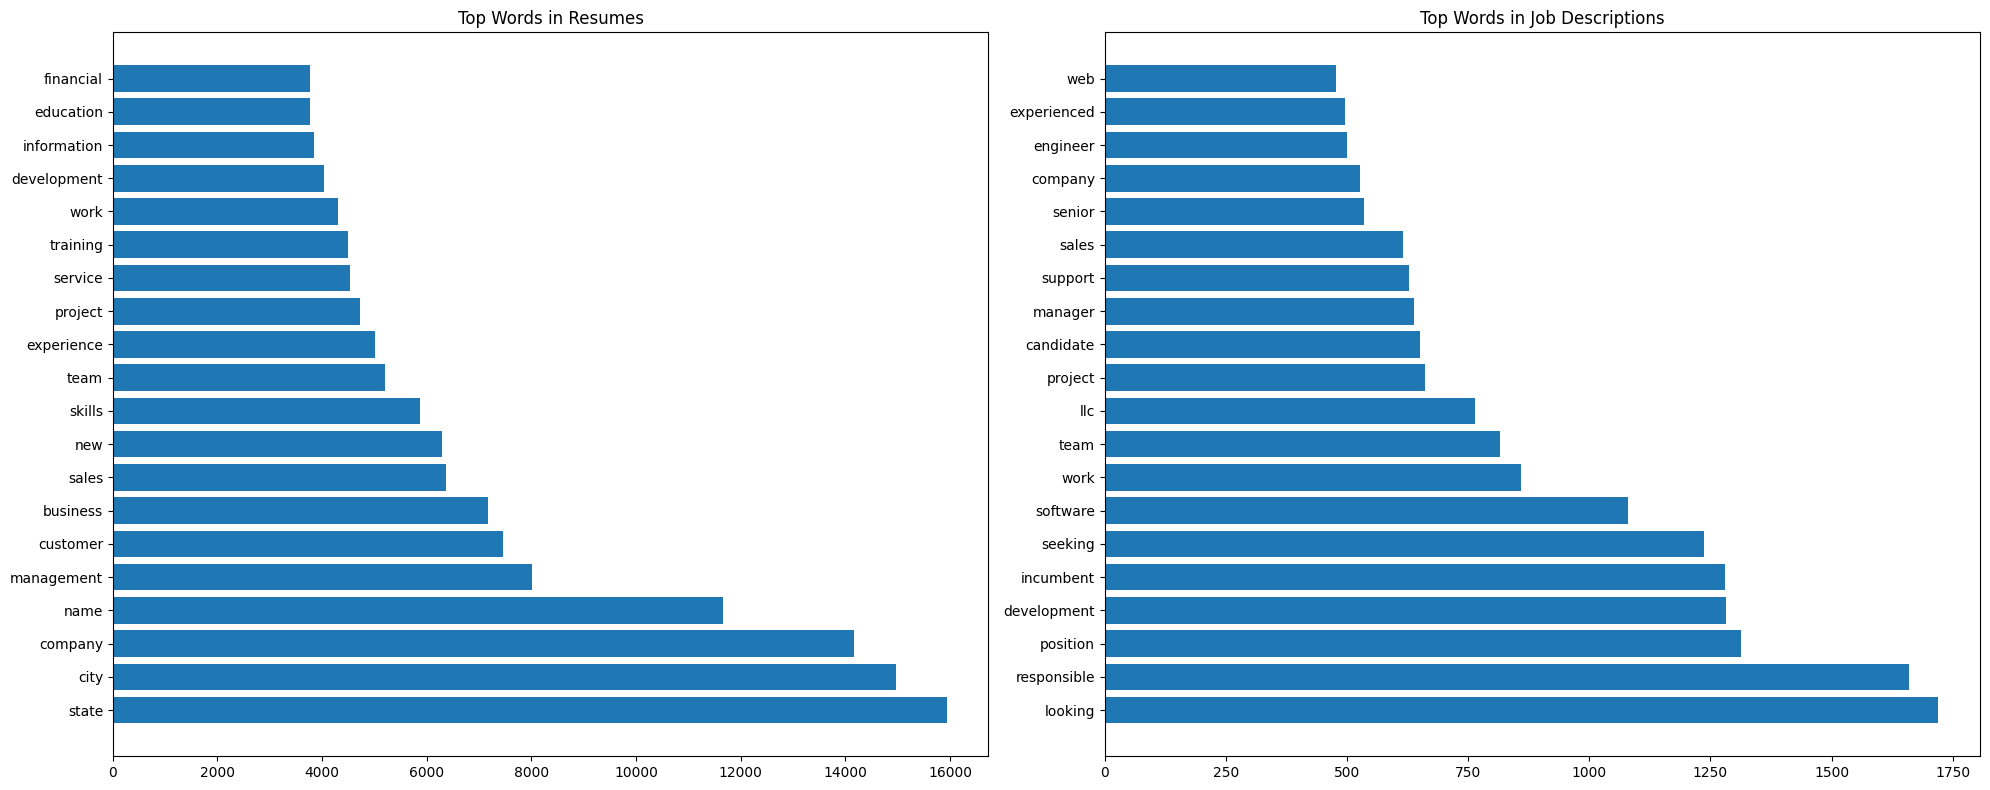

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get most common words in resumes and job postings
def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).lower().split()
    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]
    return Counter(filtered_words).most_common(n)

top_resume_words = get_top_words(resume_df['Resume_str'])
top_job_words = get_top_words(job_posts_df['JobDescription'])

# Plot word frequencies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

words, counts = zip(*top_resume_words)
ax1.barh(words, counts)
ax1.set_title('Top Words in Resumes')

words, counts = zip(*top_job_words)
ax2.barh(words, counts)
ax2.set_title('Top Words in Job Descriptions')
plt.tight_layout()
plt.show()

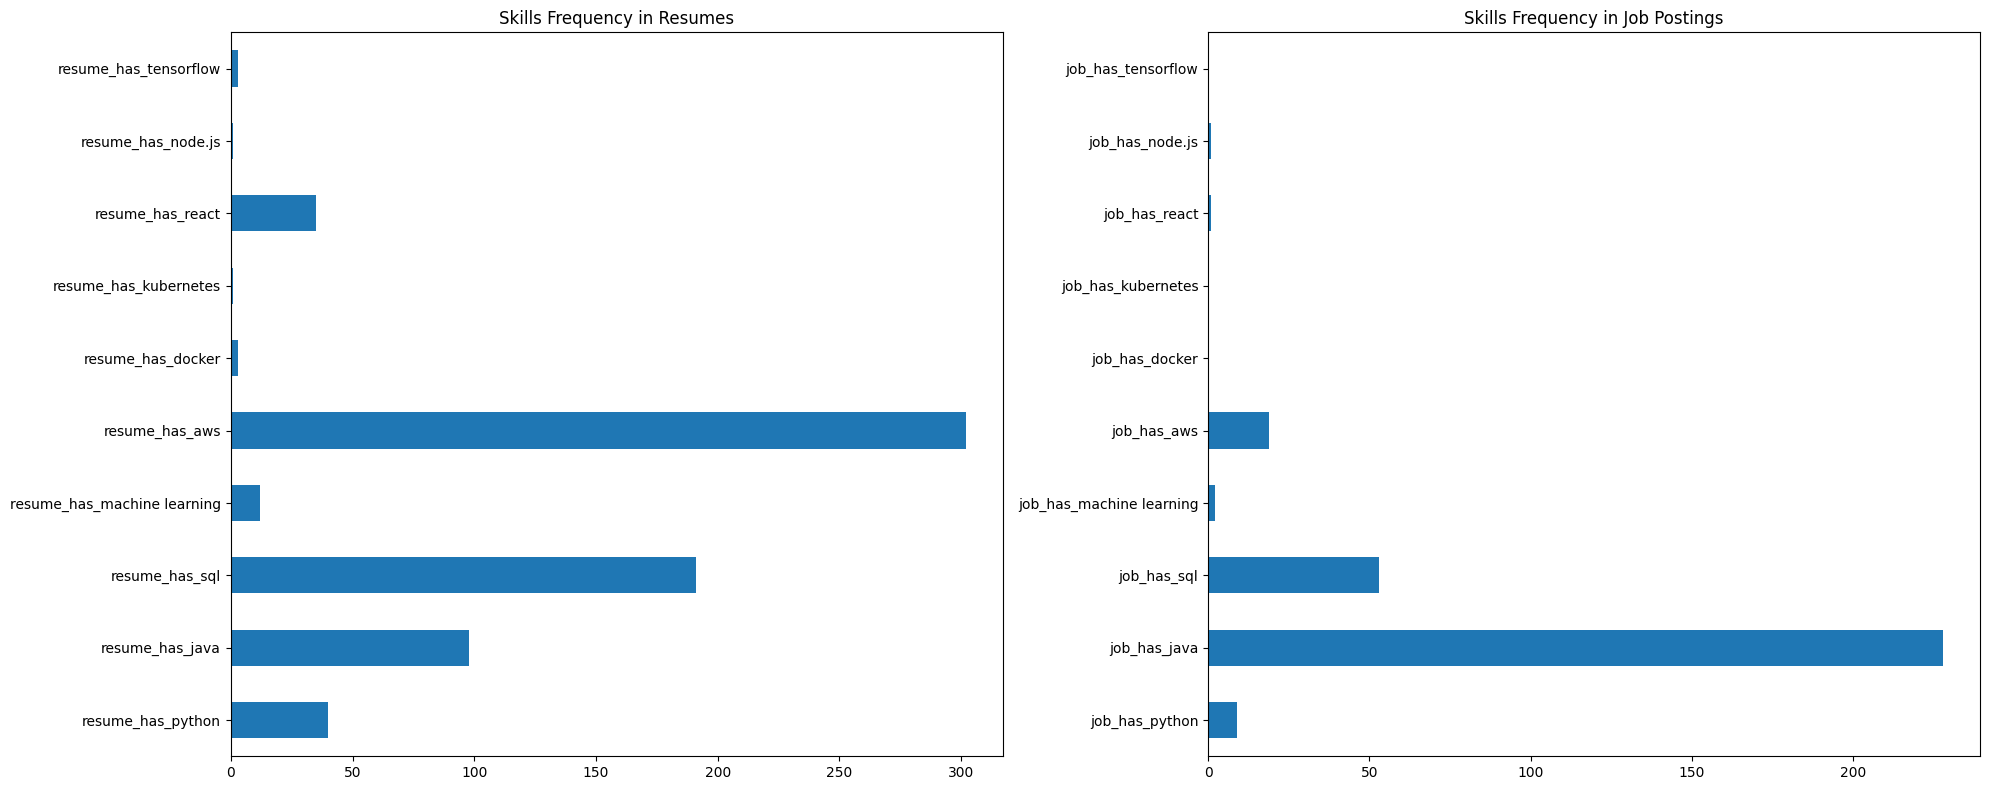

In [ ]:
# Common skills extraction (simplified)
# Add/update list with keywords we are interested in
skills_keywords = ['python', 'java', 'sql', 'machine learning', 'aws',
                   'docker', 'kubernetes', 'react', 'node.js', 'tensorflow']

def count_skills(text, skills_list):
    text_lower = text.lower()
    return sum(1 for skill in skills_list if skill in text_lower)

# Count skills in resumes and job postings
for skill in skills_keywords:
    resume_df[f'resume_has_{skill}'] = resume_df['Resume_str'].str.lower().str.contains(skill)
    job_posts_df[f'job_has_{skill}'] = job_posts_df['JobDescription'].str.lower().str.contains(skill)

# Plot skills frequency
resume_skills_count = resume_df[[f'resume_has_{skill}' for skill in skills_keywords]].sum()
job_skills_count = job_posts_df[[f'job_has_{skill}' for skill in skills_keywords]].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
resume_skills_count.plot(kind='barh', ax=ax1)
ax1.set_title('Skills Frequency in Resumes')
job_skills_count.plot(kind='barh', ax=ax2)
ax2.set_title('Skills Frequency in Job Postings')
plt.tight_layout()
plt.show()

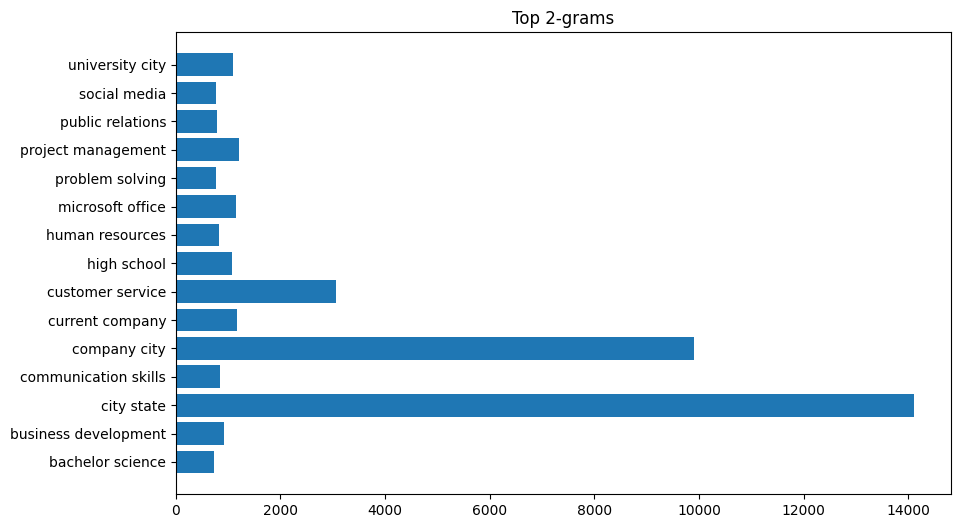

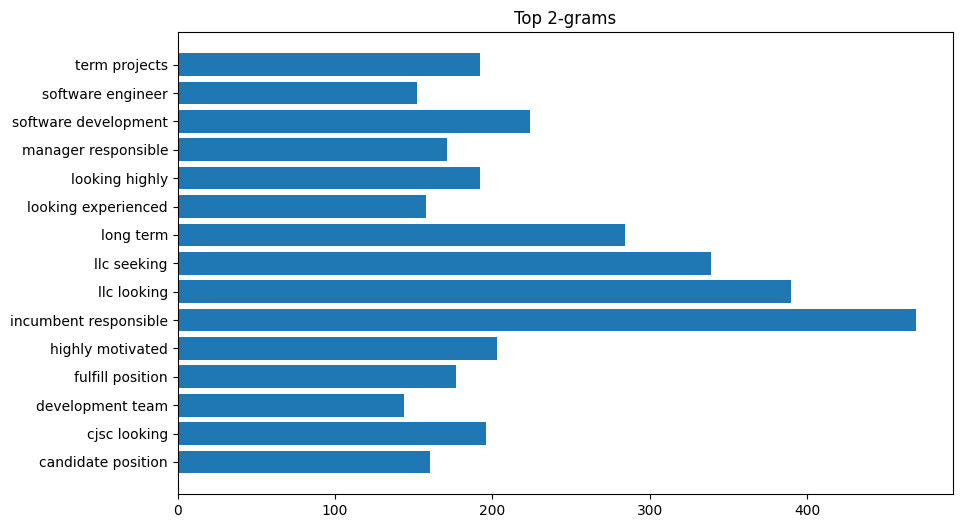

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram analysis
def plot_top_ngrams(text_series, n=2, top_k=15):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english',
                               max_features=top_k)
    X = vectorizer.fit_transform(text_series)
    words = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts)
    plt.title(f'Top {n}-grams')
    plt.show()

# Compare bigrams in resumes vs job postings
plot_top_ngrams(resume_df['Resume_str'], n=2)
plot_top_ngrams(job_posts_df['JobDescription'], n=2)

# Checkpoint #3 - Data Annotation

define weights for: skills, experience, education, semantic similarity, domain
creates labels (good match/top 25% = 1, bad match/bottom 25% = 0)

In [ ]:
from collections import Counter

#define weights
weights = {
    'skills': 0.35,
    'experience': 0.20,
    'education': 0.15,
    'semantic': 0.15,
    'domain': 0.15
}


domain_keywords = {
    'hr': ['human resources', 'hr', 'recruitment', 'recruiting', 'hiring', 'payroll', 'benefits', 'employee relations', 'compensation', 'performance management'],
    'finance': ['finance', 'financial', 'accounting', 'budget', 'audit', 'tax', 'bookkeeping', 'financial analysis'],
    'it': ['programming', 'software', 'development', 'python', 'java', 'sql', 'database', 'web development', 'network', 'system administration'],
    'sales': ['sales', 'business development', 'account management', 'revenue', 'crm'],
    'administration': ['administrative', 'secretary', 'assistant', 'coordination', 'office'],
    'research': ['research', 'analyst', 'analysis', 'data analysis', 'methodology']
}

skills = ['excel', 'word', 'powerpoint', 'sql', 'python', 'project management', 'data analysis', 'ms office', 'microsoft office']

education_levels = {'phd': 4, 'master': 3, 'bachelor': 2, 'associate': 1, 'diploma': 0.5}

experience_words = ['manager', 'director', 'senior', 'lead', 'specialist', 'analyst']

In [ ]:
#scoring

def calculate_skills_score(resume_text, job_text):
    resume_lower = resume_text.lower()
    job_lower = job_text.lower()
    job_skills = [skill for skill in skills if skill in job_lower]
    if not job_skills:
        return 0
    resume_skills = [skill for skill in job_skills if skill in resume_lower]
    return len(resume_skills) / len(job_skills)

def calculate_experience_score(resume_text):
    text_lower = resume_text.lower()
    years_matches = re.findall(r'(\d+)\s*(?:years?|yrs?)', text_lower)
    max_years = max([int(year) for year in years_matches]) if years_matches else 0
    exp_count = sum(1 for word in experience_words if word in text_lower)
    return min((max_years / 10) + (exp_count / 5), 1.0)

def calculate_education_score(resume_text):
    text_lower = resume_text.lower()
    max_education = 0
    for level, score in education_levels.items():
        if level in text_lower:
            max_education = max(max_education, score)
    return min(max_education / 4, 1.0)

def calculate_domain_score(resume_text, job_text):
    resume_lower = resume_text.lower()
    job_lower = job_text.lower()
    job_domain = 'general'
    max_domain_score = 0
    for domain, keywords in domain_keywords.items():
        domain_score = sum(1 for keyword in keywords if keyword in job_lower)
        if domain_score > max_domain_score:
            max_domain_score = domain_score
            job_domain = domain
    if job_domain == 'general':
        return 0.5
    domain_keywords_list = domain_keywords[job_domain]
    matches = sum(1 for keyword in domain_keywords_list if keyword in resume_lower)
    return min(matches / len(domain_keywords_list), 1.0)

def calculate_semantic_score(resume_text, job_text):
    resume_words = set(resume_text.lower().split())
    job_words = set(job_text.lower().split())
    if not job_words:
        return 0
    overlap = len(resume_words.intersection(job_words))
    return overlap / len(job_words) if overlap > 0 else 0


In [ ]:
#final score
def calculate_composite_score(resume_text, job_text):
    scores = {
        'skills': calculate_skills_score(resume_text, job_text),
        'experience': calculate_experience_score(resume_text),
        'education': calculate_education_score(resume_text),
        'domain': calculate_domain_score(resume_text, job_text),
        'semantic': calculate_semantic_score(resume_text, job_text)
    }
    final_score = sum(weights[component] * scores[component] for component in scores.keys())
    return final_score, scores

In [ ]:
#job text field
job_posts_df['job_text'] = job_posts_df.apply(
    lambda row: ' '.join([str(row[field]) for field in ['Title', 'JobDescription', 'JobRequirment', 'RequiredQual'] if pd.notna(row[field])]),
    axis=1
)

In [ ]:
# generate training pairs
training_data = []
job_sample = job_posts_df.head(100)

for job_idx, job_row in job_sample.iterrows():
    job_text = job_row['job_text']
    job_title = job_row['Title']
    resume_scores = []

    for resume_idx, resume_row in resume_df.iterrows():
        resume_text = resume_row['Resume_str']
        resume_id = resume_row['ID']
        final_score, component_scores = calculate_composite_score(resume_text, job_text)
        resume_scores.append({
            'job_idx': job_idx,
            'resume_idx': resume_idx,
            'job_title': job_title,
            'resume_id': resume_id,
            'final_score': final_score,
            **component_scores
        })

    # sort and keep top 10
    resume_scores.sort(key=lambda x: x['final_score'], reverse=True)
    training_data.extend(resume_scores[:10])

    if job_idx % 25 == 0:
        print(f"Processed {job_idx + 1} jobs...")

training_pairs = pd.DataFrame(training_data)


In [ ]:
#labels
scores = training_pairs['final_score']
high_threshold = scores.quantile(0.75)
low_threshold = scores.quantile(0.25)

print(f"Score thresholds: High={high_threshold:.3f}, Low={low_threshold:.3f}")

labels = []
for score in scores:
    if score >= high_threshold:
        labels.append(1)
    elif score <= low_threshold:
        labels.append(0)
    else:
        labels.append(-1)

training_pairs['label'] = labels
labeled_training_data = training_pairs[training_pairs['label'] != -1].copy()


In [ ]:
# annotated dataset
output_file = 'resume_job_training_data.csv'
labeled_training_data.to_csv(output_file, index=False)